## Class 5

Reading Canada.xlsx file, then draw 
histogram, line graphs, area graphs, horizontal graphs etc

In [1]:
import pandas as pd
import numpy as np


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sb

In [6]:
import matplotlib as mpl

In [7]:
%ls datasets

adult.csv                  Cartwheeldata.csv  movies.csv
adultosenusat.csv          census.csv         nhanes_2015_2016.csv
airline_data.csv           coches.csv         pokemon.csv
antropometria00.csv        cwurData.csv       reg_data.csv
antropometria-dataset.csv  data.csv           sample_pivot.csv
Book3.csv                  headbrain.csv      tips.csv
Canada.xlsx                mic2.xlsx          weight-height.csv


In [8]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [9]:
path = 'datasets/Canada.xlsx'
df = pd.read_excel(path,
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20), #<- este es para que se salte una portada que tiene este dataset en particular
                   skip_footer = 2 ,
                   engine = 'openpyxl'
                  )

In [10]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [12]:
df.drop(['Type', 'Coverage','AREA',  'REG', 'DEV',  'DevName'],
        axis = 1,
        inplace = True)
df.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName' : 'Region'},
          inplace = True)
df.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

In [15]:
all(isinstance(i,str) #Preguntamos si todas las columnas son string
    for i in df.columns)

False

In [16]:
df.columns = list(map(str,df.columns)) #<- para convertir todas las columnas a strings

In [17]:
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [18]:
df.set_index('Country',
             inplace = True)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


In [19]:
df['Total'] = df.iloc[:,2: ].sum(axis=1)

In [20]:
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [21]:
years = list(map(str,range(1980,2014)
                )
            )
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [22]:
import matplotlib.pyplot as plt

In [23]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [24]:
mpl.style.use('ggplot')

In [25]:
italia = df.loc['Italy',
                years]
italia

1980    1820
1981    2057
1982    1480
1983     820
1984     858
1985     667
1986     731
1987    1101
1988     885
1989    1068
1990     895
1991     711
1992     623
1993     663
1994     558
1995     508
1996     476
1997     491
1998     399
1999     410
2000     383
2001     410
2002     374
2003     321
2004     334
2005     344
2006     325
2007     320
2008     370
2009     429
2010     434
2011     374
2012     440
2013     545
Name: Italy, dtype: object

Text(7, 1190, 'Reason')

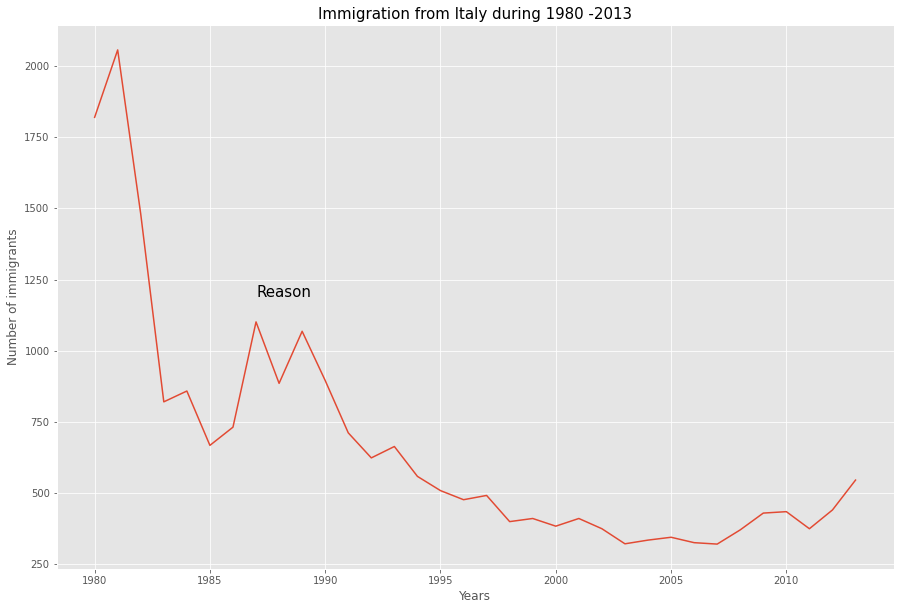

In [29]:
line_graph_italy = italia.plot(kind = 'line', 
                               figsize = (15,10)
                              )
plt.title('Immigration from Italy during 1980 -2013',
   fontsize = 15)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(7, 1190, 'Reason', fontsize = 15)


In [ ]:
China = df.loc['China',
                years]
China